##Calculating the L1 Norm (Manhattan Distance) of a Multi-Dimensional Vector

Vectors in Computer Science : Vectors are typically represented as arrays or lists of numbers.

In [ ]:
import numpy as np

# Example vector (higher-dimensional)
v = np.array([3, -4, 5, -6, 7, 8, -9])

# Compute L1 norm (Manhattan norm)
l1_norm = np.sum(np.abs(v))

# Printing the result
print("Vector:", v)
print(f"L1 Norm of {v} is: {l1_norm}")

Vector: [ 3 -4  5 -6  7  8 -9]
L1 Norm of [ 3 -4  5 -6  7  8 -9] is: 42


##Case Study 1 : L1 Norm in K-Medoids Clustering (Manhattan Distance)

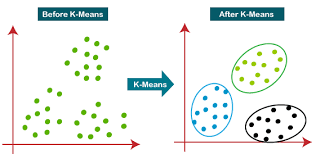

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


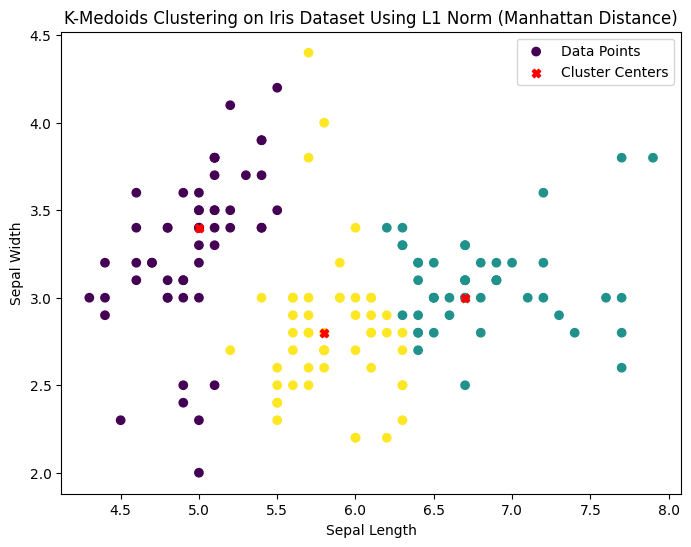

In [ ]:
# Import libraries
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization (sepal length and sepal width)

# Apply KMedoids clustering (we want 3 clusters) using L1 (Manhattan) norm
kmedoids = KMedoids(n_clusters=3, metric='manhattan', random_state=42)
kmedoids.fit(X)

# Predicted cluster labels
labels_kmedoids = kmedoids.labels_

# Visualize the clusters for KMedoids (L1 norm)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmedoids, cmap='viridis', label='Data Points')

# Plot the cluster centers (medoids)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], color='red', marker='X', label='Cluster Centers')

# Title and labels
plt.title("K-Medoids Clustering on Iris Dataset Using L1 Norm (Manhattan Distance)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


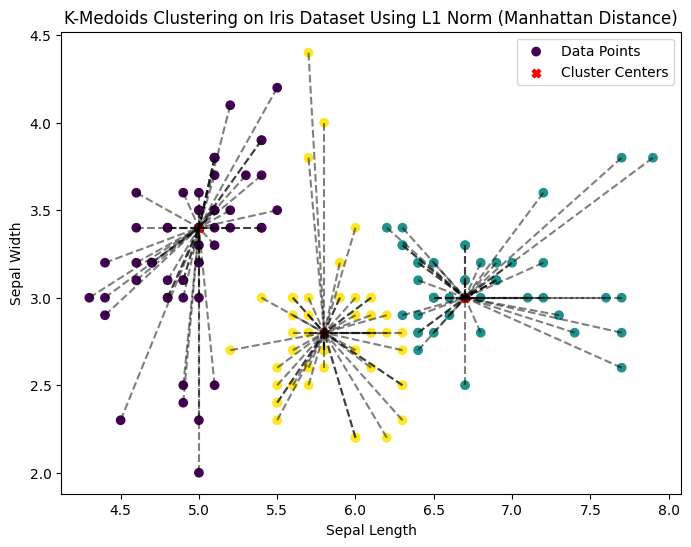

In [ ]:
# Import libraries
from sklearn_extra.cluster import KMedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization (sepal length and sepal width)

# Apply KMedoids clustering (we want 3 clusters) using L1 (Manhattan) norm
kmedoids = KMedoids(n_clusters=3, metric='manhattan', random_state=42)
kmedoids.fit(X)

# Predicted cluster labels
labels_kmedoids = kmedoids.labels_

# Visualize the clusters for KMedoids (L1 norm)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmedoids, cmap='viridis', label='Data Points')

# Plot the cluster centers (medoids)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], color='red', marker='X', label='Cluster Centers')

# Adding dotted lines representing L1 distances from each data point to its medoid
for i in range(len(X)):
    # Get the medoid for each point's cluster
    medoid = kmedoids.cluster_centers_[labels_kmedoids[i]]

    # Plot a dotted line from the data point to its corresponding medoid
    plt.plot([X[i, 0], medoid[0]], [X[i, 1], medoid[1]], 'k--', alpha=0.5)

# Title and labels
plt.title("K-Medoids Clustering on Iris Dataset Using L1 Norm (Manhattan Distance)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

The code uses K-Medoids, which is a variation of K-Means that selects actual data points as cluster centers (medoids) instead of computing mean centroids.

L₁ norm (Manhattan distance) is used here as the distance metric to assign points to clusters and update medoids.

How L₁ Norm Works in K-Medoids Clustering
The L₁ norm (Manhattan Distance) is given by:

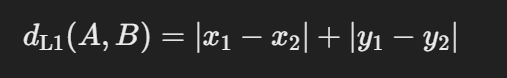

This means the distance between two points is the sum of the absolute differences of their coordinates.



Where L₁ Norm is Used in the Code:
Assigning Data Points to Clusters:

Each data point is assigned to the closest medoid using L₁ norm (Manhattan distance).
This is handled by metric='manhattan' in KMedoids().
Updating Medoids (Cluster Centers):

Instead of computing the mean (as in K-Means), K-Medoids selects the point that minimizes total Manhattan distance within a cluster as the new medoid.

##Case Study 2 : Anomaly Detection using L1 Norm


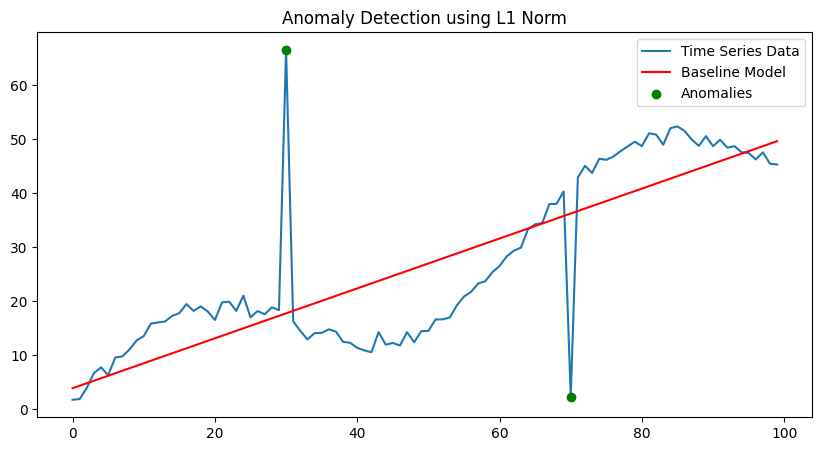

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic time series data
np.random.seed(0)
t = np.arange(100)
y = 0.5 * t + 10 * np.sin(0.1 * t) + np.random.randn(100)

# Add anomalies
y[30] += 50  # Spike
y[70] -= 40  # Drop

# Fit a linear regression model
X = t.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals using L1 norm
residuals = np.abs(y - y_pred) #Line where we use L1 norms

# Detect anomalies (threshold = 3 * median residual)
threshold = 3 * np.median(residuals)
anomalies = np.where(residuals > threshold)[0]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Time Series Data')
plt.plot(t, y_pred, label='Baseline Model', color='red')
plt.scatter(anomalies, y[anomalies], color='green', label='Anomalies', zorder=5)
plt.legend()
plt.title('Anomaly Detection using L1 Norm')
plt.show()

####Problem Statement

In time series data, anomalies such as spikes, drops, or outliers can significantly impact analysis and forecasting. Traditional anomaly detection methods may not be sufficient for complex, noisy data. The goal is to identify anomalous data points based on residuals (differences between observed values and predicted values) using the L1 norm (Manhattan distance).



####How L1 Norm Helps in This Scenario:


The L1 norm can be used to detect anomalies in time series data by measuring deviations from a baseline model. It is robust to outliers and can identify sudden spikes or drops in data.


Residual Calculation with L1 Norm:
The L1 norm is used to compute the residuals (absolute differences) between the observed and predicted values. This method is less sensitive to outliers compared to the L2 norm, making it more robust for detecting anomalies.

Anomaly Detection:
By identifying data points where the residual exceeds a threshold (set as three times the median residual), we can highlight anomalous points in the time series. These could include spikes, drops, or other deviations from the expected pattern.

Thresholding Based on Median Residuals:
Using the median of residuals as a baseline ensures that the threshold accounts for normal variations in the data without being influenced by extreme values.

Application: Detecting fraudulent transactions in financial data or identifying equipment failures in industrial sensor data.


#EXTRA / Repeated Part

##Case study 3 : Image Denoising

####Problem Statement

Noising refers to the introduction or presence of random variations in the pixel values of an image. This can happen naturally due to various factors or can be simulated artificially for testing and development purposes. Here's a brief overview:

Image Denoising:

The L1 norm is used in total variation denoising to remove noise from images while preserving edges.

Application: Medical imaging, where preserving edges is crucial for accurate diagnosis.

In simple words : It is breaking down a detailed image to simple less detailed image BUT which still hightlights the edges (key features / anamolies)


Application: MRI imaging, where the L1 norm helps in reconstructing high-quality images from fewer measurements.



Error loading image: HTTP Error 404: Not Found
Using a default image instead.


<Figure size 1500x500 with 0 Axes>

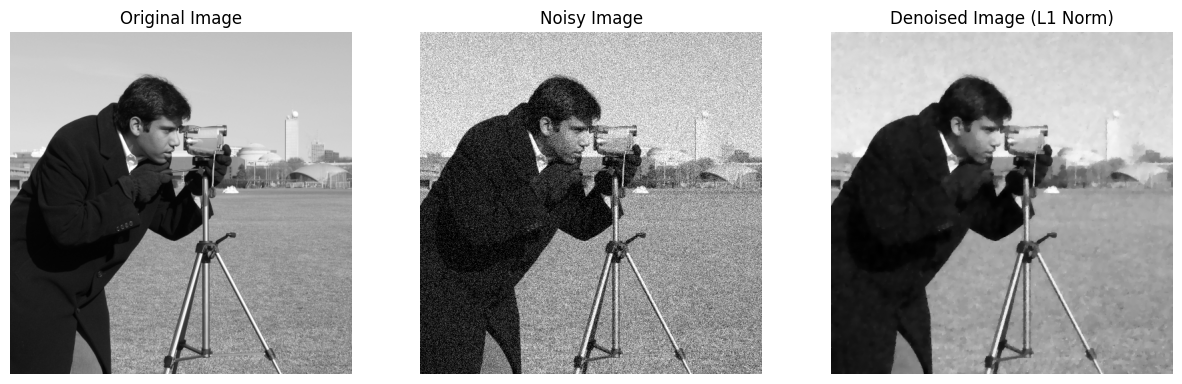

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_tv_chambolle
from skimage import io

# Load a sample medical image (replace with your actual image path or URL)
# Example using a URL (ensure it's accessible)
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/X-ray_of_the_chest.jpg/800px-X-ray_of_the_chest.jpg"

try:
    image = img_as_float(io.imread(image_url, as_gray=True))
except Exception as e:
    print(f"Error loading image: {e}")
    print("Using a default image instead.")
    image = img_as_float(data.camera())  # Fallback to a default image if loading fails


# Add artificial Gaussian noise (adjust the standard deviation as needed)
noisy_image = image + 0.1 * np.random.randn(*image.shape)
noisy_image = np.clip(noisy_image, 0, 1)  # Ensure pixel values are within the valid range

# Apply Total Variation (TV) Denoising with L1 norm
weight = 0.1  # Adjust the weight parameter for denoising strength
denoised_image = denoise_tv_chambolle(noisy_image, weight=weight)


# Display the images
plt.figure(figsize=(15, 5))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (L1 Norm)')
plt.axis('off')

# plt.subplot(1, 3, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Medical Image')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(noisy_image, cmap='gray')
# plt.title('Noisy Medical Image')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(denoised_image, cmap='gray')
# plt.title(f'Denoised Image (TV, weight={weight})')
# plt.axis('off')

plt.show()


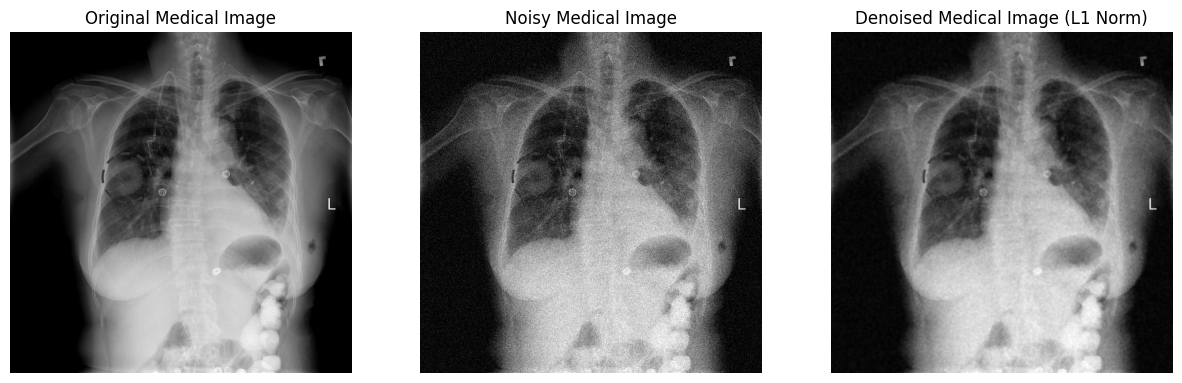

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_tv_chambolle

# Load a satellite image (replace 'satellite.jpg' with an actual file)
img = "https://www.nih.gov/sites/default/files/styles/featured_media_breakpoint-medium/public/news-events/news-releases/2017/20170927-lung-mass.jpg?itok=wSFXjg6d&timestamp=1506520936"
image = img_as_float(io.imread(img, as_gray=True))

# Add artificial Gaussian noise
noisy_image = image + 0.1 * np.random.randn(*image.shape)
noisy_image = np.clip(noisy_image, 0, 1)

# Apply Total Variation (TV) Denoising (L1 Norm)
denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1)

# Plot results
# plt.subplot(1, 3, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Medical Image')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(noisy_image, cmap='gray')
# plt.title('Noisy Medical Image')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(denoised_image, cmap='gray')
# plt.title('Denoised Medical Image (L1 Norm)')
# plt.axis('off')

# plt.suptitle("Medical Imaging: Enhancing Diagnostic Clarity with L1 Norm Denoising", fontsize=16)
# plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Medical Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Medical Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Medical Image (L1 Norm)')
plt.axis('off')

plt.show()

### Summary of Denoising and Its Impact on Medical Imaging




- **Enhanced Visibility of Major Structures:**
  - Denoised images are easier to interpret because noise that might obscure important structures (e.g., tissue boundaries, lesions, or masses) is reduced.
  - This allows radiologists to focus on larger, significant features rather than being distracted by fine, noisy details.

- **Detection of Abnormalities:**
  - While denoising improves the clarity of boundaries, it doesn't guarantee that subtle indicators of early-stage cancer (like microcalcifications or irregular masses) will be clearly visible.

- **Role of L1 Norm-Based Denoising (Total Variation Denoising):**
  - Utilizes the L1 norm to reduce noise while preserving important edges and shapes in the image.
  - It is a trade-off: reducing noise helps reveal the major structures, but it may also smooth out some fine details.

*Overall, L1 norm-based denoising enhances the visibility of critical features in medical images, facilitating diagnosis, but it is not a standalone diagnostic tool.*

##Case Study - 4 : Feature Selection Using Lasso Regression (L1 Regularization)

Background : Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that helps prevent overfitting by shrinking the coefficients of less important features to zero.

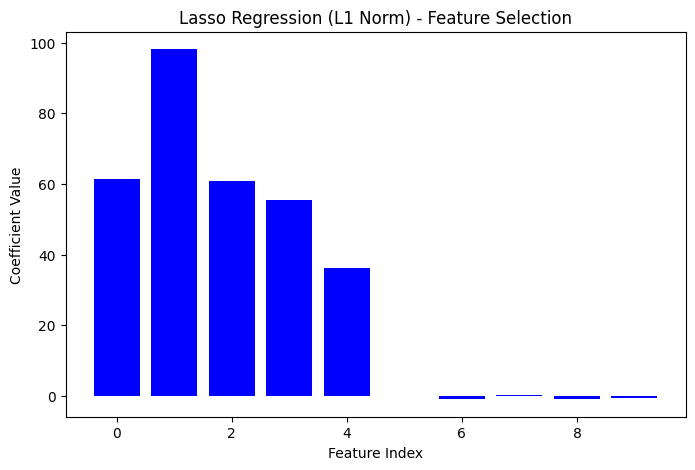

Coefficients: [61.45095218 98.15251346 60.73424417 55.34543903 36.07857298 -0.17154517
 -0.99694662  0.17594052 -0.81222676 -0.66225895]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic house price data (features, price)
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Add some irrelevant features (L1 will remove them)
X = np.hstack([X, np.random.randn(100, 5)])  # Adding 5 random features

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)  # Alpha controls regularization strength
lasso.fit(X_train, y_train)

# Get feature importance (some coefficients will be zero)
coefficients = lasso.coef_

# Plot feature importance
plt.figure(figsize=(8,5))
plt.bar(range(len(coefficients)), coefficients, color=['red' if c==0 else 'blue' for c in coefficients])
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression (L1 Norm) - Feature Selection")
plt.show()

print("Coefficients:", coefficients)

As you can see, we can select the feature with index 1 since it has the highest coefficient value. (Also we can see the matrix above to see the coefficient values of each index)

High coefficient value features have the most influence on the prediction and are considered the most important.

Noisiness in an image refers to random variations in pixel intensity that distort the original image content. Noise is unwanted information that can obscure important details and reduce image quality.